In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("ks2_national_school_characteristics_2016_to_2023_provisional.csv")

In [3]:
data.head()

,time_period,time_identifier,geographic_level,country_code,country_name,version,breakdown_topic,breakdown,school_type,gender,...,pt_writta_early_development_of_expected_standard,pt_writta_foundations_of_expected_standard,pt_writta_engagement_model_or_below_pre_key_stage_standards,pt_writta_below_interim_pre_key_stage_standards,pt_writta_absent,pt_writta_disapplied,pt_scita_met_expected_standard,pt_scita_not_met_expected_standard,pt_scita_absent,pt_scita_disapplied
0,201516,Academic year,National,E92000001,England,Final,School cohort size,1 to 15 pupils,State-funded mainstream schools,Total,...,1,1,z,0,0,0,84,16,0,0
1,201516,Academic year,National,E92000001,England,Final,School cohort size,16 to 30 pupils,State-funded mainstream schools,Total,...,1,1,z,0,0,0,82,18,0,0
2,201516,Academic year,National,E92000001,England,Final,School cohort size,31 to 60 pupils,State-funded mainstream schools,Total,...,1,1,z,0,0,0,81,19,0,0
3,201516,Academic year,National,E92000001,England,Final,School cohort size,61 to 90 pupils,State-funded mainstream schools,Total,...,1,1,z,0,0,0,82,18,0,0
4,201516,Academic year,National,E92000001,England,Final,School cohort size,91+ pupils,State-funded mainstream schools,Total,...,1,0,z,0,0,0,83,16,0,0


In [8]:
data.shape

(440, 112)

In [5]:
# Check for unique values in each column to identify placeholders
unique_values = {}
for col in data.columns:
    unique_values[col] = data[col].unique()

# Display the unique values for the first few columns to get an idea
# (showing all could be too lengthy for display, so we'll check a subset)
unique_values_subset = {k: unique_values[k] for k in list(data.columns)[:10]}  # Show unique values for the first 10 columns
unique_values_subset


{'time_period': array([201516, 201617, 201718, 201819, 201920, 202021, 202122, 202223]),
 'time_identifier': array(['Academic year'], dtype=object),
 'geographic_level': array(['National'], dtype=object),
 'country_code': array(['E92000001'], dtype=object),
 'country_name': array(['England'], dtype=object),
 'version': array(['Final', 'Provisional'], dtype=object),
 'breakdown_topic': array(['School cohort size', 'School phase', 'School religious character',
        'School type'], dtype=object),
 'breakdown': array(['1 to 15 pupils', '16 to 30 pupils', '31 to 60 pupils',
        '61 to 90 pupils', '91+ pupils', 'Junior', 'Middle', 'Other',
        'Primary', 'Church of England', 'Jewish', 'Methodist', 'Muslim',
        'No religious character', 'Other Christian faith',
        'Other religious character', 'Roman Catholic', 'Sikh',
        'Academies and free schools', 'All schools',
        'Alternative provision', 'Converter academies', 'Free schools',
        'Independent schools', 

In [6]:
# Since there are many columns, we'll check for non-numeric values in columns that contain 'pt_' or 't_', which should be numeric
numeric_placeholder_check = {}

# Checking for non-numeric values
for col in data.columns:
    if 'pt_' in col or 't_' in col:
        non_numeric_values = pd.to_numeric(data[col], errors='coerce').isna().sum()
        if non_numeric_values > 0:
            numeric_placeholder_check[col] = data[col].unique()

numeric_placeholder_check_subset = {k: numeric_placeholder_check[k] for k in list(numeric_placeholder_check.keys())[:10]}  # Show subset for brevity
numeric_placeholder_check_subset


{'t_rwm_eligible_pupils': array(['23546', '132412', '263625', '105913', '53277', '79375', '15677',
        '4617', '479104', '112614', '1274', '569', '379', '405896', '2551',
        'c', '55280', '178', '59085', '57330', '116415', '301688',
        '289248', '590936', '294', '24', '318', '40226', '39074', '79300',
        '449', '413', '862', '2419', '2619', '5038', '234834', '227524',
        '462358', '18410', '17843', '36253', '293919', '284854', '578773',
        '298975', '286605', '585580', '299269', '286629', '585898', '5056',
        '1751', '6807', '23142', '129895', '269958', '116297', '52807',
        '78552', '14834', '5222', '493491', '113710', '1305', '609', '406',
        '417201', '2627', '55972', '239', '72372', '69899', '142271',
        '308026', '295289', '603315', '333', '40', '373', '50704', '48588',
        '99292', '620', '1240', '1744', '2090', '3834', '228318', '221510',
        '449828', '21048', '20691', '41739', '300690', '291409', '592099',
        '30594

In [7]:
# Replace placeholders 'z', 'c', 'x', and any other non-numeric characters with NaN
data.replace({'z': np.nan, 'c': np.nan, 'x': np.nan}, inplace=True)

# Convert all columns that should be numeric to floats
for col in data.columns:
    if 'pt_' in col or 't_' in col:  
        data[col] = pd.to_numeric(data[col], errors='coerce')

data_dtypes_after_conversion = data.dtypes
data_dtypes_after_conversion


time_period                             int64
time_identifier                        object
geographic_level                       object
country_code                           object
country_name                           object
                                       ...   
pt_writta_disapplied                  float64
pt_scita_met_expected_standard        float64
pt_scita_not_met_expected_standard    float64
pt_scita_absent                       float64
pt_scita_disapplied                   float64
Length: 112, dtype: object

In [8]:
# Calculate the number & percentage of missing values in each column
missing_values_count = data.isnull().sum()
missing_values_percentage = (data.isnull().sum() / len(data)) * 100

missing_values_df = pd.DataFrame({
    'missing_count': missing_values_count,
    'missing_percentage': missing_values_percentage
})

missing_values_df_sorted = missing_values_df.sort_values(by='missing_percentage', ascending=False)
missing_values_df_sorted.head(10)  

,missing_count,missing_percentage
t_read_unable_to_access,387,87.954545
pt_mat_unable_to_access,387,87.954545
t_mat_unable_to_access,387,87.954545
pt_gps_unable_to_access,387,87.954545
t_gps_unable_to_access,387,87.954545
pt_read_unable_to_access,387,87.954545
t_writta_foundations_of_expected_standard,280,63.636364
pt_writta_foundations_of_expected_standard,280,63.636364
pt_writta_early_development_of_expected_standard,280,63.636364
pt_writta_growing_development_of_expected_standard,280,63.636364


In [9]:
# Define a threshold for dropping columns based on missing percentage
threshold_percentage = 50

columns_to_drop = missing_values_df[missing_values_df['missing_percentage'] > threshold_percentage].index
data_cleaned = data.drop(columns=columns_to_drop)
data_cleaned_shape = data_cleaned.shape
remaining_columns = data_cleaned.columns

data_cleaned_shape, remaining_columns


((440, 82),
 Index(['time_period', 'time_identifier', 'geographic_level', 'country_code',
        'country_name', 'version', 'breakdown_topic', 'breakdown',
        'school_type', 'gender', 'no_schools', 't_rwm_eligible_pupils',
        't_rwm_met_expected_standard', 't_rwm_met_higher_standard',
        't_read_eligible_pupils', 't_read_met_expected_standard',
        't_read_met_higher_standard', 't_read_not_achieved_expected_standard',
        't_read_working_below_assessment', 't_read_absent',
        't_read_unable_to_access_or_just_arrived',
        't_read_avg_scaled_score_eligible_pupils', 't_read_sum_scaled_scores',
        't_gps_eligible_pupils', 't_gps_met_expected_standard',
        't_gps_met_higher_standard', 't_gps_not_achieved_expected_standard',
        't_gps_working_below_assessment', 't_gps_absent',
        't_gps_unable_to_access_or_just_arrived',
        't_gps_avg_scaled_score_eligible_pupils', 't_gps_sum_scaled_scores',
        't_mat_eligible_pupils', 't_mat_me

In [10]:
# Drop rows with any missing values
data_cleaned_complete = data_cleaned.dropna()

# Display the shape of the data after dropping rows
data_cleaned_complete_shape = data_cleaned_complete.shape

data_cleaned_complete_shape

(274, 82)

In [14]:
# List of key attainment variables
attainment_variables = [
    'avg_gps_scaled_score',
    'avg_mat_scaled_score',
    'avg_read_scaled_score',
    'pt_gps_met_expected_standard',
    'pt_gps_met_higher_standard',
    'pt_mat_met_expected_standard',
    'pt_mat_met_higher_standard',
    'pt_read_met_expected_standard',
    'pt_read_met_higher_standard'
]

descriptive_stats = data_cleaned_complete[attainment_variables].describe()

# Additionally, calculate skewness and kurtosis for the selected attainment variables
skewness = data_cleaned_complete[attainment_variables].skew().to_frame(name='Skewness')
kurtosis = data_cleaned_complete[attainment_variables].kurtosis().to_frame(name='Kurtosis')
descriptive_stats_combined = pd.concat([descriptive_stats, skewness.T, kurtosis.T])

descriptive_stats_combined


,avg_mat_scaled_score,pt_gps_met_expected_standard,pt_gps_met_higher_standard,pt_mat_met_expected_standard,pt_mat_met_higher_standard,pt_read_met_expected_standard,pt_read_met_higher_standard,avg_gps_scaled_score,avg_read_scaled_score
count,274.0,274.0,274.0,274.0,274.0,274.0,274.0,NaN,NaN
mean,102.879562,67.770073,29.532847,67.131387,22.412409,66.313869,25.270073,NaN,NaN
std,4.65397,24.556619,13.140019,23.742457,10.269696,22.823981,10.510071,NaN,NaN
min,89.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
25%,104.0,71.0,27.0,72.0,21.0,70.0,24.0,NaN,NaN
50%,104.0,76.0,31.0,75.0,24.0,74.0,28.0,NaN,NaN
75%,105.0,79.0,36.0,77.75,27.0,77.0,31.0,NaN,NaN
max,110.0,93.0,61.0,90.0,55.0,87.0,46.0,NaN,NaN
Skewness,-1.954818,-2.062732,-0.946463,-2.122198,-0.697306,-2.143041,-1.265945,-1.919671,-2.051738
Kurtosis,2.572809,2.717064,1.067425,2.918679,1.286725,3.01698,1.161257,2.808537,3.456857


In [17]:
# Convert 'avg_gps_scaled_score' and 'avg_read_scaled_score' to numeric types explicitly
data_cleaned_complete['avg_gps_scaled_score'] = pd.to_numeric(data_cleaned_complete['avg_gps_scaled_score'], errors='coerce')
data_cleaned_complete['avg_read_scaled_score'] = pd.to_numeric(data_cleaned_complete['avg_read_scaled_score'], errors='coerce')
descriptive_stats_specific_numeric = data_cleaned_complete[['avg_gps_scaled_score', 'avg_read_scaled_score']].describe()
skewness_specific_numeric = data_cleaned_complete[['avg_gps_scaled_score', 'avg_read_scaled_score']].skew().to_frame(name='Skewness')
kurtosis_specific_numeric = data_cleaned_complete[['avg_gps_scaled_score', 'avg_read_scaled_score']].kurtosis().to_frame(name='Kurtosis')

descriptive_stats_specific_numeric_combined = pd.concat(
    [descriptive_stats_specific_numeric, skewness_specific_numeric.T, kurtosis_specific_numeric.T]
)

descriptive_stats_specific_numeric_combined


/var/folders/58/fdjqf08x0tdbt_prysz9dqth0000gn/T/ipykernel_9787/2466595822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned_complete['avg_gps_scaled_score'] = pd.to_numeric(data_cleaned_complete['avg_gps_scaled_score'], errors='coerce')
/var/folders/58/fdjqf08x0tdbt_prysz9dqth0000gn/T/ipykernel_9787/2466595822.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned_complete['avg_read_scaled_score'] = pd.to_numeric(data_cleaned_complete['avg_read_scaled_score'], errors='coerce')


,avg_gps_scaled_score,avg_read_scaled_score
count,274.000000,274.000000
mean,104.193431,103.496350
std,4.843616,3.987387
min,88.000000,89.000000
25%,105.000000,104.000000
50%,105.000000,105.000000
75%,106.000000,106.000000
max,112.000000,108.000000
Skewness,-1.919671,-2.051738
Kurtosis,2.808537,3.456857


In [18]:
# Calculate the correlation matrix for the key attainment variables
correlation_matrix = data_cleaned_complete[attainment_variables].corr()

correlation_matrix


,avg_gps_scaled_score,avg_mat_scaled_score,avg_read_scaled_score,pt_gps_met_expected_standard,pt_gps_met_higher_standard,pt_mat_met_expected_standard,pt_mat_met_higher_standard,pt_read_met_expected_standard,pt_read_met_higher_standard
avg_gps_scaled_score,1.000000,0.958629,0.965319,0.983518,0.954396,0.955063,0.901283,0.968060,0.931509
avg_mat_scaled_score,0.958629,1.000000,0.929388,0.971840,0.927447,0.987626,0.939731,0.960920,0.912345
avg_read_scaled_score,0.965319,0.929388,1.000000,0.955109,0.902184,0.921808,0.855693,0.970824,0.959659
pt_gps_met_expected_standard,0.983518,0.971840,0.955109,1.000000,0.933426,0.984996,0.880582,0.989418,0.926680
pt_gps_met_higher_standard,0.954396,0.927447,0.902184,0.933426,1.000000,0.915337,0.927282,0.904151,0.924343
pt_mat_met_expected_standard,0.955063,0.987626,0.921808,0.984996,0.915337,1.000000,0.900295,0.973190,0.905102
pt_mat_met_higher_standard,0.901283,0.939731,0.855693,0.880582,0.927282,0.900295,1.000000,0.860347,0.866972
pt_read_met_expected_standard,0.968060,0.960920,0.970824,0.989418,0.904151,0.973190,0.860347,1.000000,0.943456
pt_read_met_higher_standard,0.931509,0.912345,0.959659,0.926680,0.924343,0.905102,0.866972,0.943456,1.000000


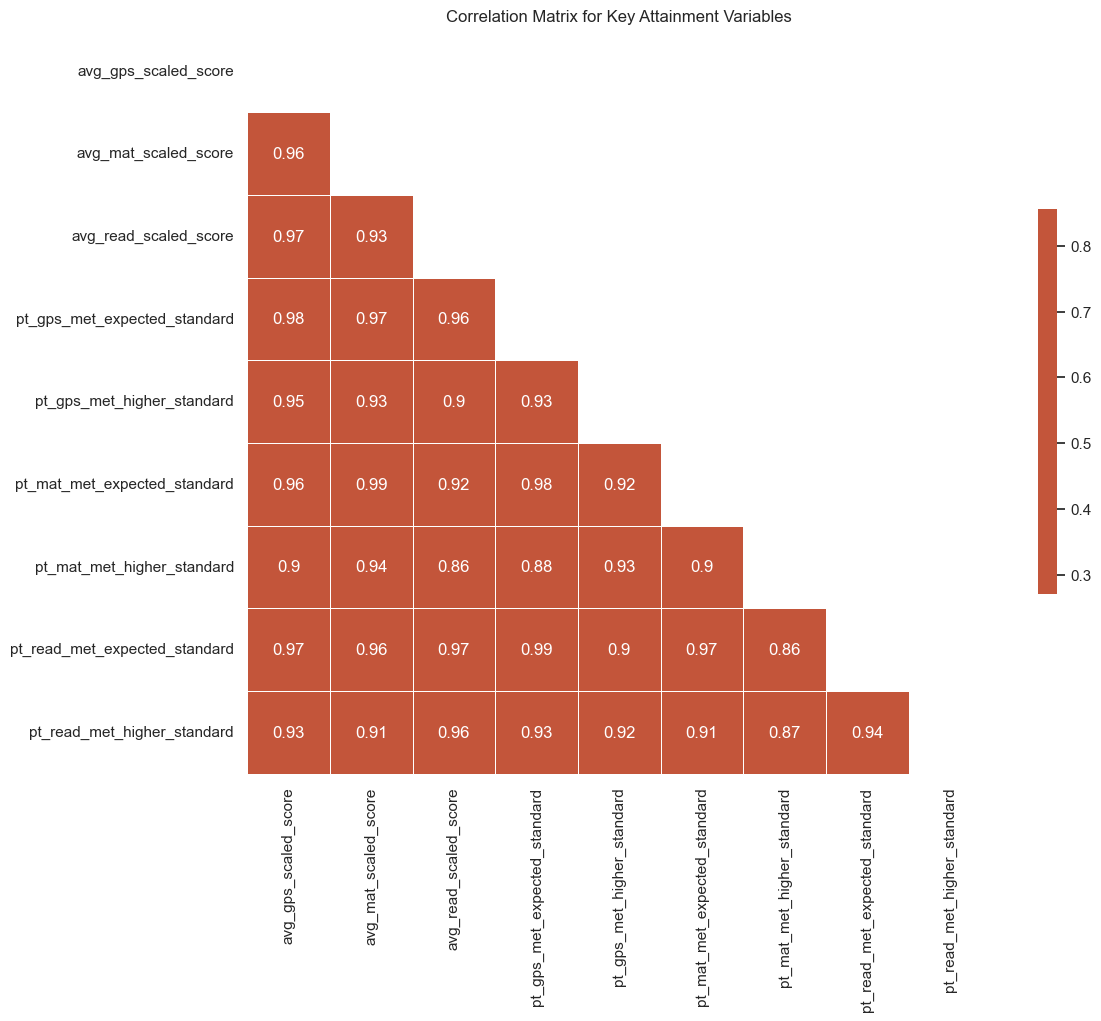

In [19]:
sns.set(style="white")
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Matrix for Key Attainment Variables')
plt.show()


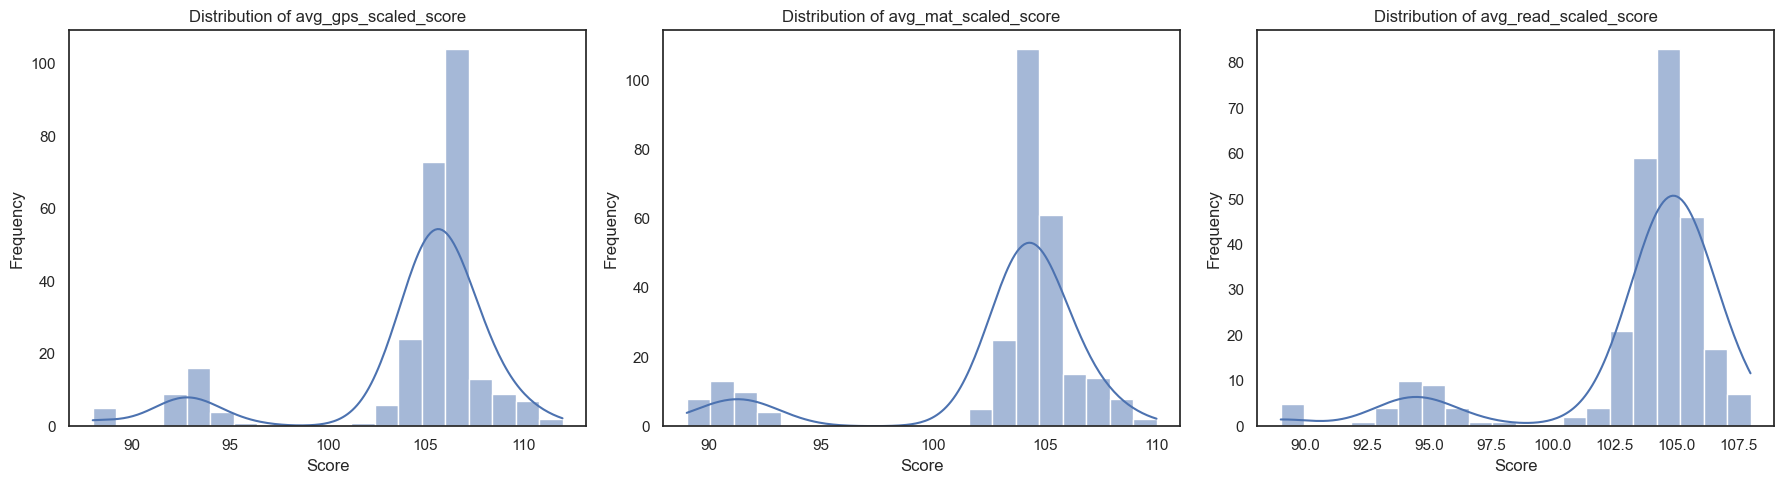

In [20]:
plt.figure(figsize=(18, 5))
for i, col in enumerate(['avg_gps_scaled_score', 'avg_mat_scaled_score', 'avg_read_scaled_score'], 1):
    plt.subplot(1, 3, i)
    sns.histplot(data_cleaned_complete[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Score')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


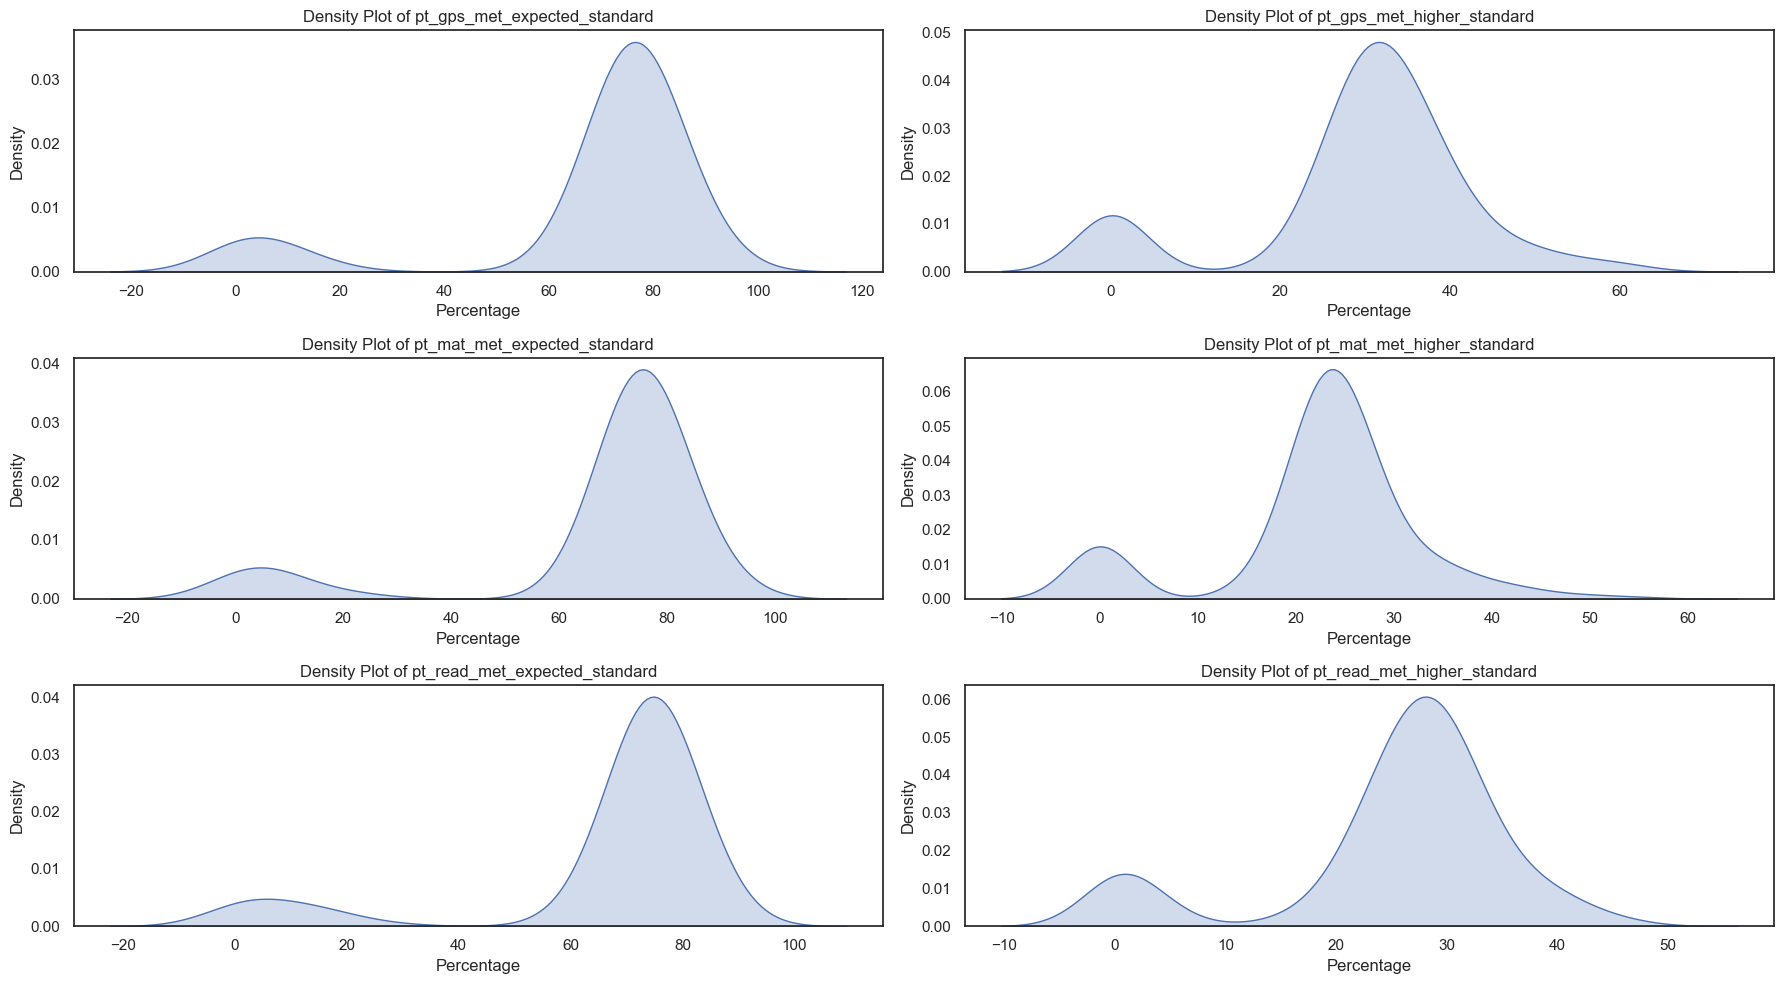

In [21]:
plt.figure(figsize=(18, 10))
percentage_metrics = [
    'pt_gps_met_expected_standard',
    'pt_gps_met_higher_standard',
    'pt_mat_met_expected_standard',
    'pt_mat_met_higher_standard',
    'pt_read_met_expected_standard',
    'pt_read_met_higher_standard'
]

for i, col in enumerate(percentage_metrics, 1):
    plt.subplot(3, 2, i)
    sns.kdeplot(data_cleaned_complete[col], fill=True)
    plt.title(f'Density Plot of {col}')
    plt.xlabel('Percentage')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()


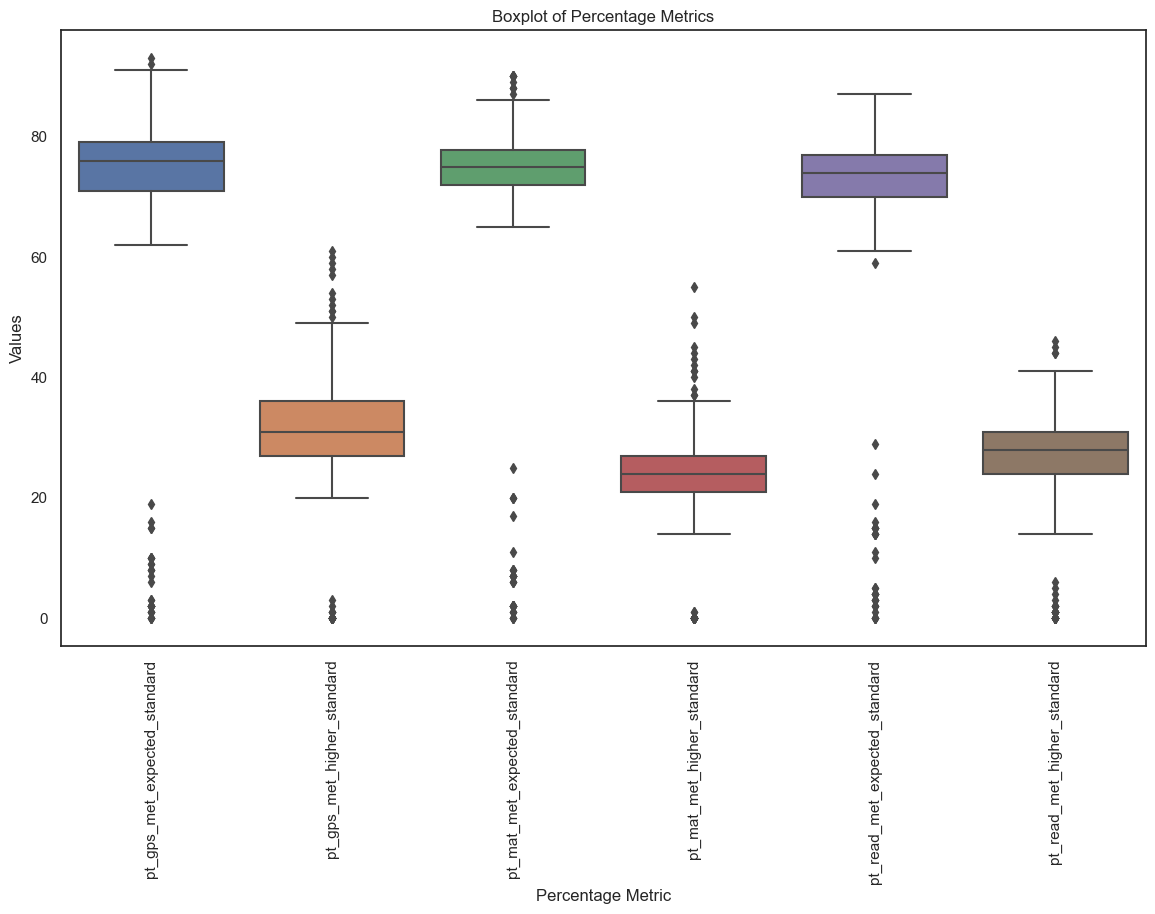

In [22]:
plt.figure(figsize=(14, 8))
percentage_metrics_long_df = data_cleaned_complete.melt(value_vars=percentage_metrics)

# Create a boxplot for all percentage metrics
sns.boxplot(x='variable', y='value', data=percentage_metrics_long_df)
plt.xticks(rotation=90)  
plt.title('Boxplot of Percentage Metrics')
plt.xlabel('Percentage Metric')
plt.ylabel('Values')
plt.show()


The metrics for pupils meeting the expected standard (pt_gps_met_expected_standard, pt_mat_met_expected_standard, pt_read_met_expected_standard) have a high median, indicating a generally high performance across schools.
The metrics for pupils meeting the higher standard (pt_gps_met_higher_standard, pt_mat_met_higher_standard, pt_read_met_higher_standard) have a wider spread and lower median, reflecting more variability and generally lower percentages.


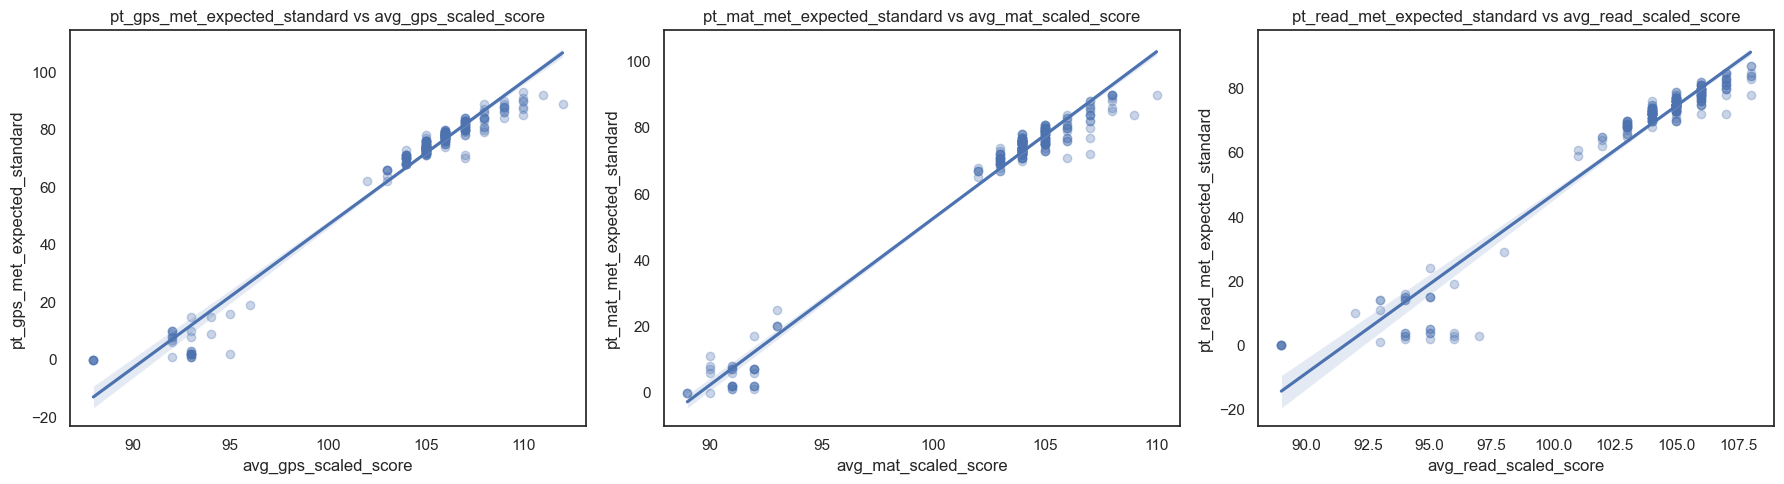

In [23]:
plt.figure(figsize=(18, 5))

# Defining a function to create a scatter plot with a regression line
def plot_scatter_with_reg(df, x, y, subplot_index):
    plt.subplot(1, 3, subplot_index)
    sns.regplot(x=x, y=y, data=df, scatter_kws={'alpha':0.3})
    plt.title(f'{y} vs {x}')

plot_scatter_with_reg(data_cleaned_complete, 'avg_gps_scaled_score', 'pt_gps_met_expected_standard', 1)
plot_scatter_with_reg(data_cleaned_complete, 'avg_mat_scaled_score', 'pt_mat_met_expected_standard', 2)
plot_scatter_with_reg(data_cleaned_complete, 'avg_read_scaled_score', 'pt_read_met_expected_standard', 3)

plt.tight_layout()
plt.show()


There is a positive correlation between the average scaled scores and the percentage of pupils meeting the expected standard in each subject. This suggests that, as average scores increase, so does the percentage of pupils meeting the expected standard, which aligns with our earlier correlation analysis.
The relationship appears to be linear, as indicated by the fitted regression line, which shows a clear upward trend.
There is some variance around the regression line, indicating that while there is a strong relationship, other factors may also influence the percentage of pupils meeting the expected standards.

In [24]:
categorical_vars = data_cleaned_complete.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_vars


['time_identifier',
 'geographic_level',
 'country_code',
 'country_name',
 'version',
 'breakdown_topic',
 'breakdown',
 'school_type',
 'gender',
 'no_schools']

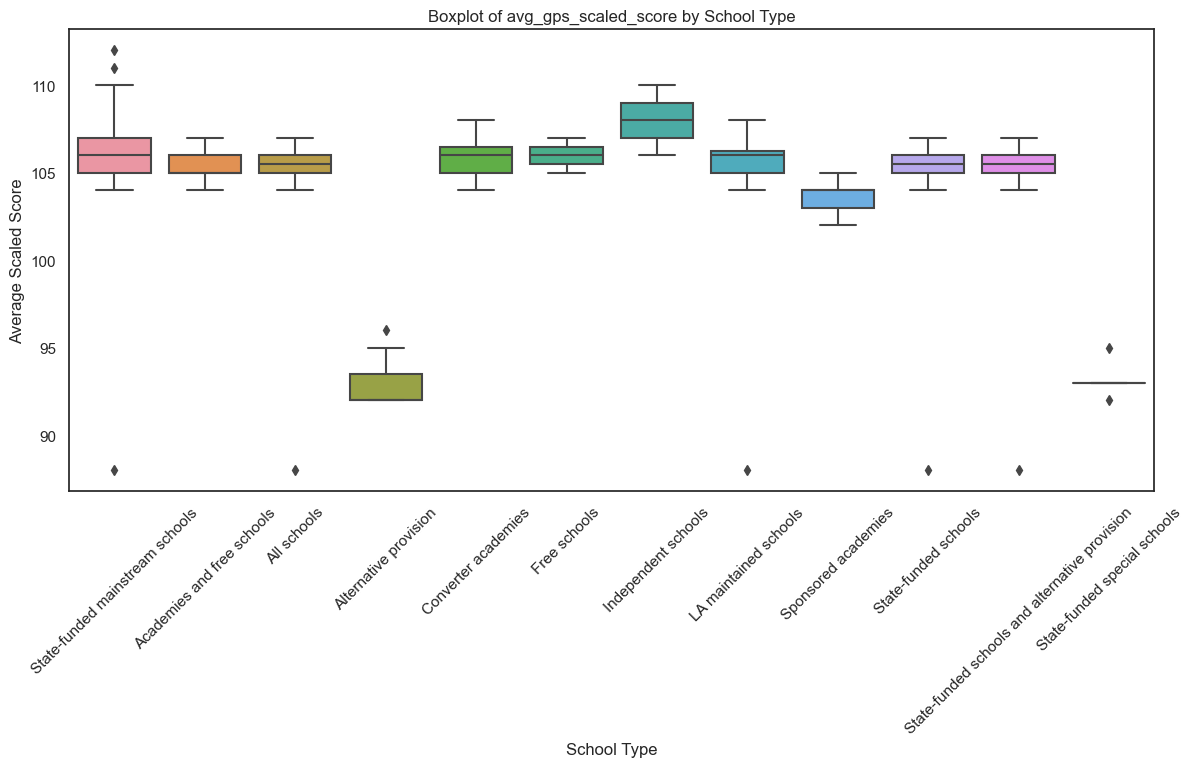

In [25]:
# Grouped box plots for 'school_type' against the average scaled scores
plt.figure(figsize=(14, 6))

score_to_plot = 'avg_gps_scaled_score'

sns.boxplot(x='school_type', y=score_to_plot, data=data_cleaned_complete)
plt.title(f'Boxplot of {score_to_plot} by School Type')
plt.xlabel('School Type')
plt.ylabel('Average Scaled Score')
plt.xticks(rotation=45) 
plt.show()


In [26]:
unique_breakdowns = data_cleaned_complete['breakdown'].unique()
unique_school_types = data_cleaned_complete['school_type'].unique()
unique_genders = data_cleaned_complete['gender'].unique()

unique_breakdowns, unique_school_types, unique_genders


(array(['1 to 15 pupils', '16 to 30 pupils', '31 to 60 pupils',
        '61 to 90 pupils', '91+ pupils', 'Junior', 'Middle', 'Other',
        'Primary', 'Church of England', 'Jewish', 'Methodist', 'Muslim',
        'No religious character', 'Other Christian faith',
        'Roman Catholic', 'Sikh', 'Academies and free schools',
        'All schools', 'Alternative provision', 'Converter academies',
        'Free schools', 'Independent schools', 'LA maintained schools',
        'Sponsored academies', 'State-funded mainstream schools',
        'State-funded schools',
        'State-funded schools and alternative provision',
        'State-funded special schools', 'Other religious character'],
       dtype=object),
 array(['State-funded mainstream schools', 'Academies and free schools',
        'All schools', 'Alternative provision', 'Converter academies',
        'Free schools', 'Independent schools', 'LA maintained schools',
        'Sponsored academies', 'State-funded schools',
        

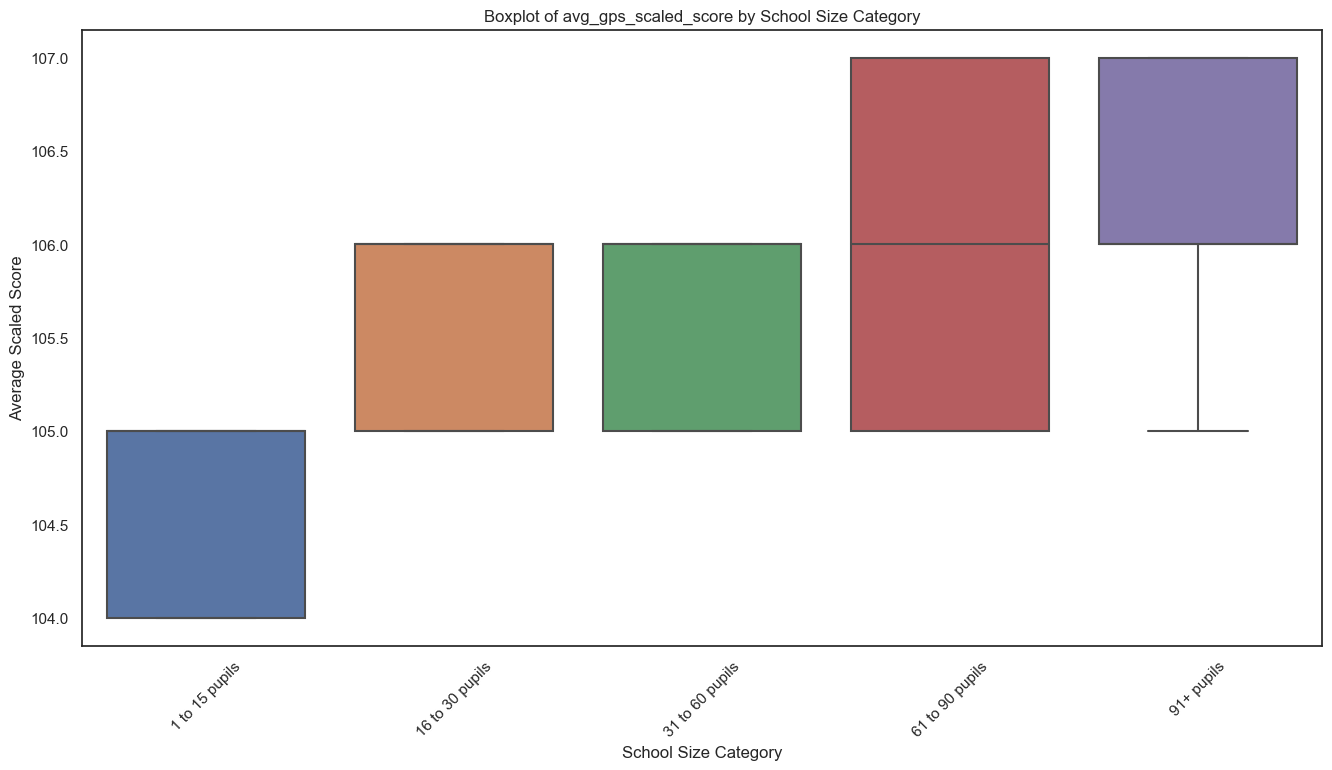

In [28]:
# Grouped box plots for school size categories against the average scaled scores
plt.figure(figsize=(16, 8))

score_to_plot = 'avg_gps_scaled_score'

school_size_categories = ['1 to 15 pupils', '16 to 30 pupils', '31 to 60 pupils', '61 to 90 pupils', '91+ pupils']
school_size_data = data_cleaned_complete[data_cleaned_complete['breakdown'].isin(school_size_categories)]

sns.boxplot(x='breakdown', y=score_to_plot, data=school_size_data, order=school_size_categories)
plt.title(f'Boxplot of {score_to_plot} by School Size Category')
plt.xlabel('School Size Category')
plt.ylabel('Average Scaled Score')
plt.xticks(rotation=45) 
plt.show()


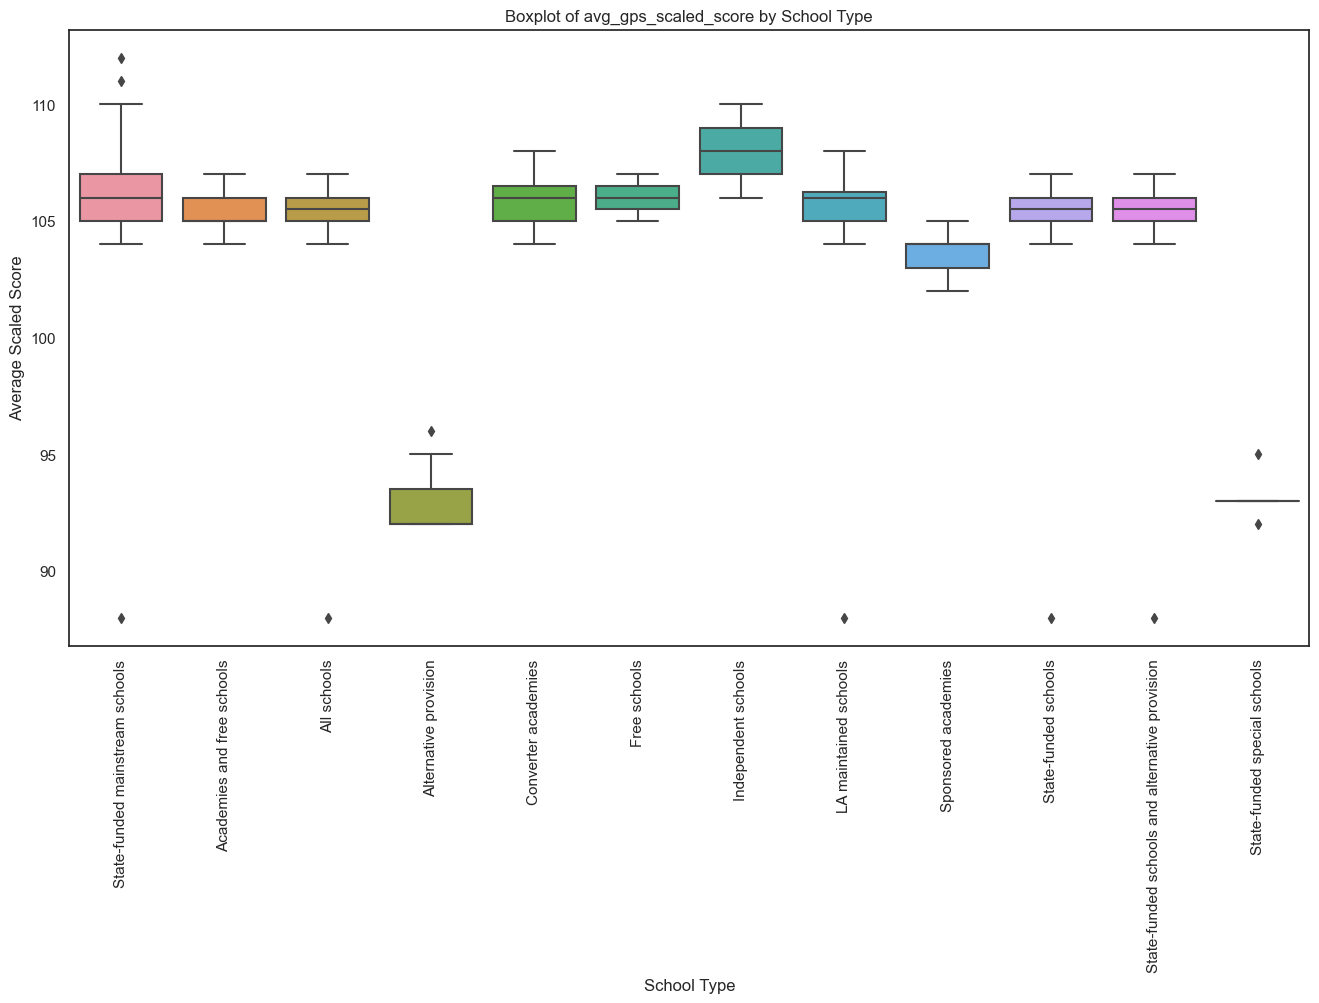

In [29]:
# Grouped box plots for administrative categories against the average scaled scores
plt.figure(figsize=(16, 8))

score_to_plot = 'avg_gps_scaled_score'
sns.boxplot(x='school_type', y=score_to_plot, data=data_cleaned_complete)
plt.title(f'Boxplot of {score_to_plot} by School Type')
plt.xlabel('School Type')
plt.ylabel('Average Scaled Score')
plt.xticks(rotation=90) 
plt.show()


In [31]:
# Filtering out unique values that might indicate religious schools
potential_religious_categories = data_cleaned_complete['breakdown'].dropna().unique()
religious_keywords = ['Christian', 'Catholic', 'Jewish', 'Muslim', 'Sikh', 'Hindu', 'Religious']
religious_categories = [cat for cat in potential_religious_categories if any(religion in cat for religion in religious_keywords)]

religious_categories


['Jewish', 'Muslim', 'Other Christian faith', 'Roman Catholic', 'Sikh']

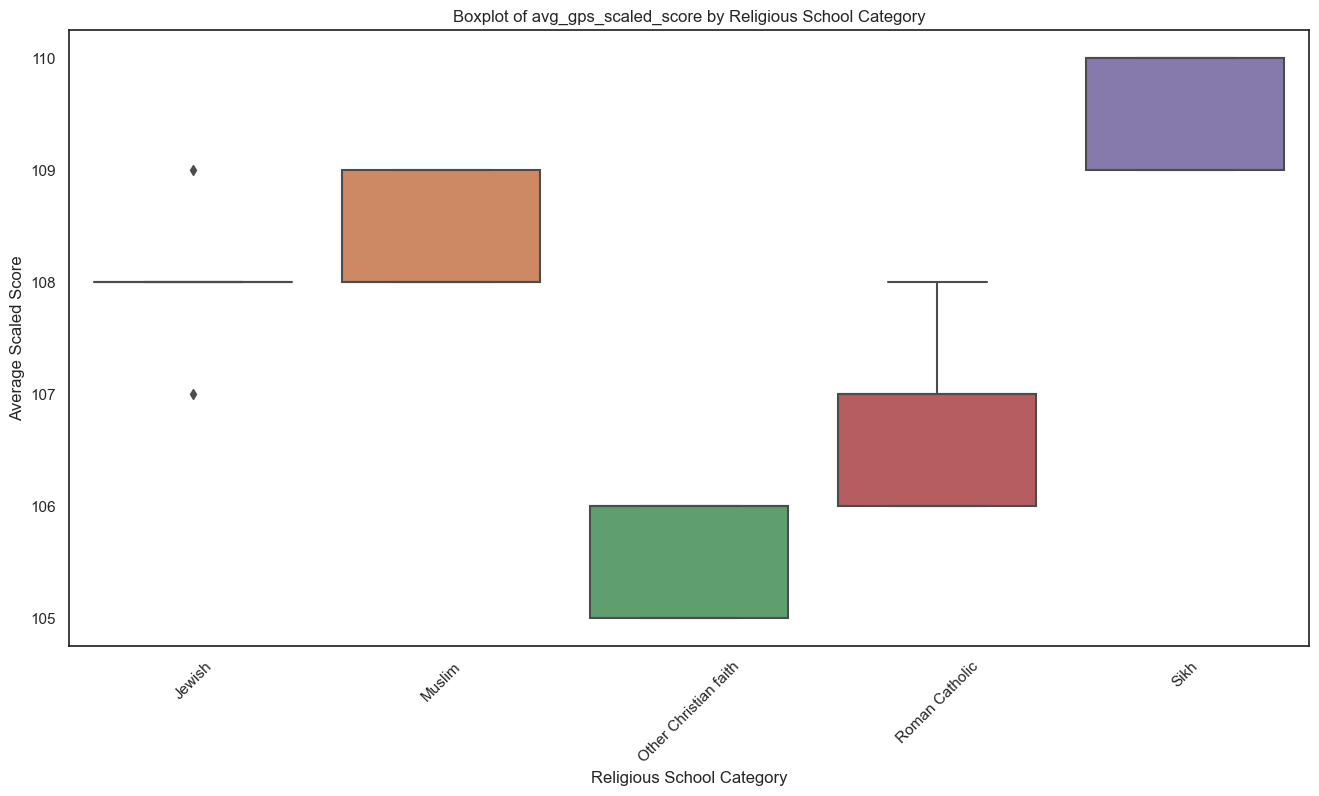

In [32]:
# Grouped box plots for religious school categories against the average scaled scores
plt.figure(figsize=(16, 8))

score_to_plot = 'avg_gps_scaled_score'

# Filter the data for the identified religious school categories
religious_school_data = data_cleaned_complete[data_cleaned_complete['breakdown'].isin(religious_categories)]
sns.boxplot(x='breakdown', y=score_to_plot, data=religious_school_data, order=religious_categories)
plt.title(f'Boxplot of {score_to_plot} by Religious School Category')
plt.xlabel('Religious School Category')
plt.ylabel('Average Scaled Score')
plt.xticks(rotation=45) 
plt.show()


In [33]:
from scipy.stats import f_oneway
anova_data = [data_cleaned_complete[score_to_plot][data_cleaned_complete['breakdown'] == category]
              for category in religious_categories]
f_statistic, p_value = f_oneway(*anova_data)

f_statistic, p_value


(27.99999999999995, 6.04771117755032e-08)

The ANOVA test has provided us with a significant result (theindicating that there are statistically significant differences in the average scaled scores for grammar, punctuation, and spelling among the different religious school categories.

Since the p-value is much lower than the typical significance level of 0.05, we can reject the null hypothesis that there are no differences among the groups. This implies that religious affiliation may have an impact on the attainment scores in this area.

In [35]:
admin_categories = data_cleaned_complete['school_type'].dropna().unique()
anova_admin_data_checks = {category: data_cleaned_complete[score_to_plot][data_cleaned_complete['school_type'] == category].empty
                           for category in admin_categories}

anova_admin_data_checks

{'State-funded mainstream schools': False,
 'Academies and free schools': False,
 'All schools': False,
 'Alternative provision': False,
 'Converter academies': False,
 'Free schools': False,
 'Independent schools': False,
 'LA maintained schools': False,
 'Sponsored academies': False,
 'State-funded schools': False,
 'State-funded schools and alternative provision': False,
 'State-funded special schools': False}

In [36]:
# Prepare the data for ANOVA - we need to group the scores by administrative category
admin_categories_to_compare = [cat for cat in admin_categories if cat != 'All schools']
anova_admin_data = [data_cleaned_complete[score_to_plot][data_cleaned_complete['school_type'] == category]
                    for category in admin_categories_to_compare]

f_statistic_admin, p_value_admin = f_oneway(*anova_admin_data)

f_statistic_admin, p_value_admin


(67.06058555383402, 1.2349156048110722e-64)

The ANOVA test for administrative categories reveals a highly significant result indicating that there are statistically significant differences in the average scaled scores for grammar, punctuation, and spelling among the different administrative categories.

Given this very small p-value, we can confidently reject the null hypothesis that all administrative categories have the same mean scores. This suggests that the type of administration (e.g., academies, free schools, independent schools, etc.) is associated with differences in attainment scores.

In [37]:
absenteeism_variables_updated = [
    'pt_gps_absent',
    'pt_mat_absent',
    'pt_read_absent'
]

lack_of_access_variables_updated = [
    'pt_gps_unable_to_access_or_just_arrived',
    'pt_mat_unable_to_access_or_just_arrived',
    'pt_read_unable_to_access_or_just_arrived'
]

correlation_matrix_updated = data_cleaned_complete[
    absenteeism_variables_updated + lack_of_access_variables_updated + attainment_variables
].corr()

correlation_focus_updated = correlation_matrix_updated.loc[
    absenteeism_variables_updated + lack_of_access_variables_updated, 
    attainment_variables
]

correlation_focus_updated


,avg_gps_scaled_score,avg_mat_scaled_score,avg_read_scaled_score,pt_gps_met_expected_standard,pt_gps_met_higher_standard,pt_mat_met_expected_standard,pt_mat_met_higher_standard,pt_read_met_expected_standard,pt_read_met_higher_standard
pt_gps_absent,-0.565403,-0.553064,-0.553885,-0.549570,-0.507671,-0.557214,-0.481727,-0.529795,-0.495154
pt_mat_absent,-0.560259,-0.591512,-0.512114,-0.566290,-0.535549,-0.612201,-0.509458,-0.527392,-0.501808
pt_read_absent,-0.581192,-0.617753,-0.549047,-0.591833,-0.556989,-0.635556,-0.530924,-0.561179,-0.540526
pt_gps_unable_to_access_or_just_arrived,-0.568454,-0.421355,-0.606527,-0.496297,-0.414158,-0.401680,-0.402329,-0.510953,-0.439307
pt_mat_unable_to_access_or_just_arrived,-0.617036,-0.504964,-0.644711,-0.559708,-0.476476,-0.491984,-0.465612,-0.565196,-0.499419
pt_read_unable_to_access_or_just_arrived,-0.578930,-0.432645,-0.614620,-0.506404,-0.423630,-0.412054,-0.410984,-0.518944,-0.447102


In [38]:
# Group the data by school type and calculate the mean percentage of absenteeism and lack of access
school_type_absent_access_means = data_cleaned_complete.groupby('school_type')[
    absenteeism_variables_updated + lack_of_access_variables_updated
].mean()

school_type_absent_access_means_sorted = school_type_absent_access_means.sort_values(by='pt_gps_absent', ascending=False)

school_type_absent_access_means_sorted


,pt_gps_absent,pt_mat_absent,pt_read_absent,pt_gps_unable_to_access_or_just_arrived,pt_mat_unable_to_access_or_just_arrived,pt_read_unable_to_access_or_just_arrived
school_type,,,,,,
Alternative provision,7.733333,11.200000,6.466667,4.133333,3.866667,4.466667
All schools,1.937500,0.312500,0.062500,1.812500,1.062500,1.812500
State-funded special schools,1.000000,1.466667,1.000000,0.800000,0.866667,0.866667
Independent schools,0.866667,1.266667,0.600000,0.200000,0.200000,0.200000
Sponsored academies,0.333333,0.400000,0.333333,0.000000,0.000000,0.066667
Academies and free schools,0.200000,0.333333,0.066667,0.000000,0.000000,0.000000
State-funded mainstream schools,0.152381,0.276190,0.095238,0.428571,0.219048,0.419048
Converter academies,0.133333,0.200000,0.066667,0.000000,0.000000,0.000000
Free schools,0.133333,0.266667,0.066667,0.266667,0.266667,0.333333


/var/folders/58/fdjqf08x0tdbt_prysz9dqth0000gn/T/ipykernel_9787/3417275148.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Percentage', y='school_type', hue='Metric', data=melted_school_type_absent_access, ci=None)


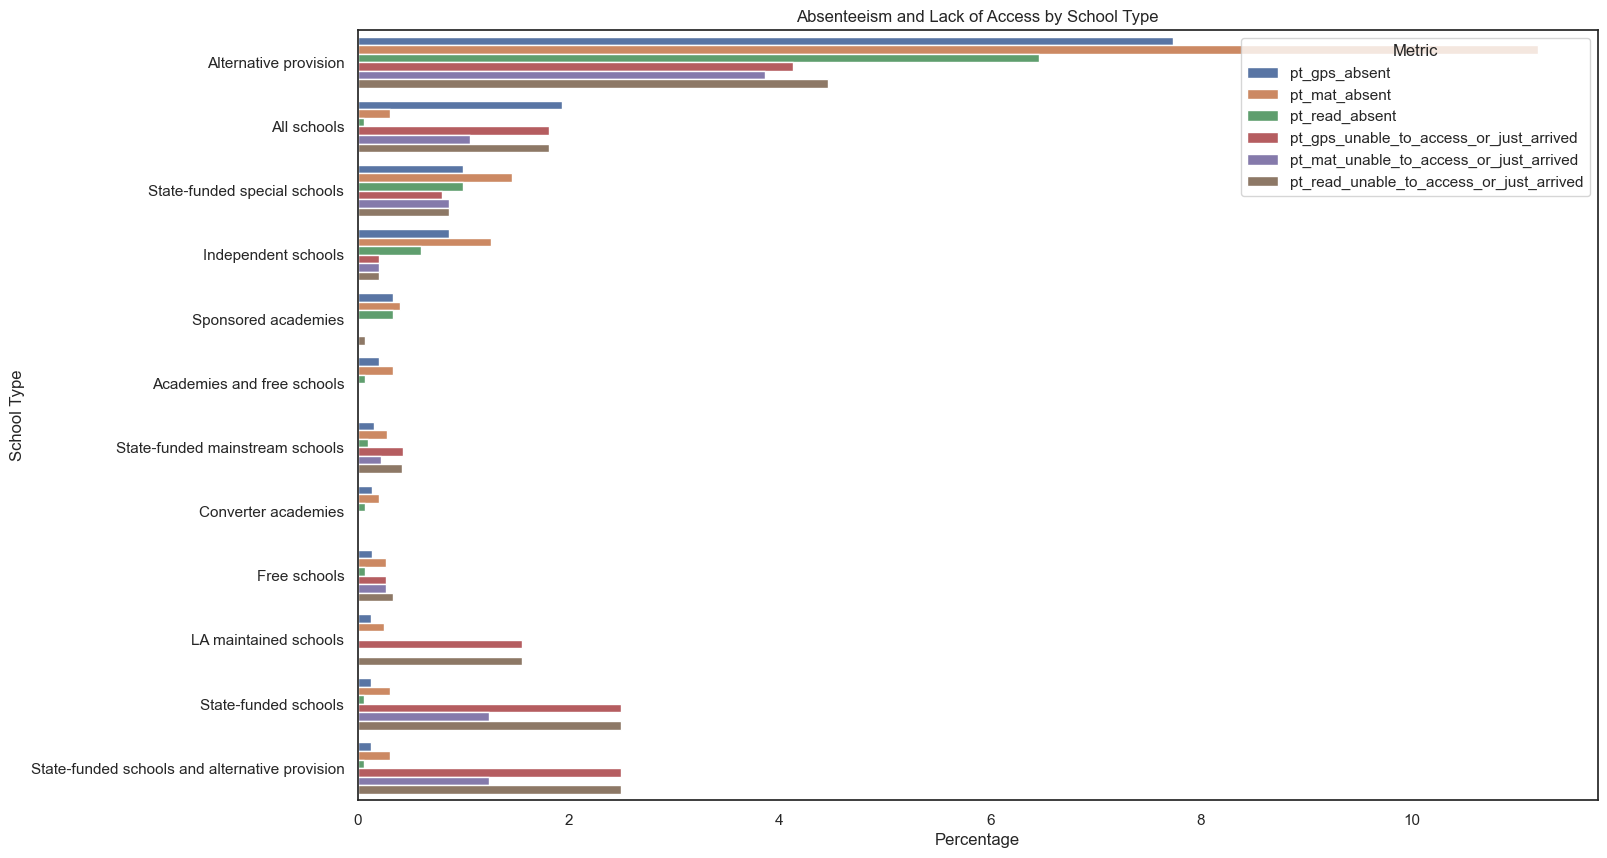

In [39]:
melted_school_type_absent_access = school_type_absent_access_means_sorted.reset_index().melt(id_vars='school_type', 
                                                                                              var_name='Metric', 
                                                                                              value_name='Percentage')

# Plotting
plt.figure(figsize=(16, 10))
sns.barplot(x='Percentage', y='school_type', hue='Metric', data=melted_school_type_absent_access, errorbar=None)
plt.title('Absenteeism and Lack of Access by School Type')
plt.xlabel('Percentage')
plt.ylabel('School Type')
plt.legend(title='Metric', loc='upper right')
plt.show()


In [41]:
# Perform ANOVA for one of the absenteeism metrics across school types
school_types = school_type_absent_access_means_sorted.index.unique()
anova_absenteeism_data = [
    data_cleaned_complete['pt_gps_absent'][data_cleaned_complete['school_type'] == school_type].dropna()
    for school_type in school_types
]
f_statistic_absenteeism, p_value_absenteeism = f_oneway(*anova_absenteeism_data)

f_statistic_absenteeism, p_value_absenteeism


(21.637358761158712, 4.428664131118637e-31)

the ANOVA test for the 'pt_gps_absent' metric across different school types yields a highly significant result with a This indicates that there are statistically significant differences in the rates of absenteeism for grammar, punctuation, and spelling tests among the various school types.

Given this very small p-value, we can reject the null hypothesis that all school types have the same mean absenteeism rate. This suggests that the type of school significantly influences absenteeism rates.

In [42]:
# Perform ANOVA for one of the lack of access metrics across school types
anova_lack_of_access_data = [
    data_cleaned_complete['pt_gps_unable_to_access_or_just_arrived'][data_cleaned_complete['school_type'] == school_type].dropna()
    for school_type in school_types
]

f_statistic_lack_of_access, p_value_lack_of_access = f_oneway(*anova_lack_of_access_data)

f_statistic_lack_of_access, p_value_lack_of_access


(1.317399122210061, 0.21448737971648174)